<a href="https://colab.research.google.com/github/vishnu-nitc/Algorithms_Python/blob/master/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=12287a885c37faf2b9de7064c7f3c0ae1ad1e3df0ab6affebd8100b3ff1f1dda
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
!wget https://github.com/tulip-lab/sit742/raw/develop/Jupyter/data/item_listing_category.zip

--2023-09-29 10:12:08--  https://github.com/tulip-lab/sit742/raw/develop/Jupyter/data/item_listing_category.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tulip-lab/sit742/develop/Jupyter/data/item_listing_category.zip [following]
--2023-09-29 10:12:08--  https://raw.githubusercontent.com/tulip-lab/sit742/develop/Jupyter/data/item_listing_category.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26084015 (25M) [application/zip]
Saving to: ‘item_listing_category.zip’

item_listing_catego 100%[===================>]  24.88M  77.6MB/s    in 0.3s    

2023-09-29 10:12:09 (77.6 MB/s) - ‘item_l

In [3]:
!ls item_listing*

item_listing_category.zip


In [4]:
!unzip item_listing_category.zip

Archive:  item_listing_category.zip
  inflating: item_listing_category.csv  


In [5]:
!ls

item_listing_category.csv  item_listing_category.zip  sample_data


Question 1.1

Find the missing values:

• Write the function missing_values_table and use the dataframe as the input. The function
should return the information of missing values by column (only for columns which have
missing values and the returned value should be the count of rows has missing values);

• For columns which have missing values, could you impute the missing values with the
mean value of the particular columns? (if you think it could not be done with mean value,
write down the reason in comments and report rather than code)

In [6]:
import pandas as pd


In [7]:
def missing_value_fn(df):
  missing_series = df.isna().sum()
  missing_columns = missing_series[missing_series.ne(0)]
  return missing_columns

In [8]:
df = pd.read_csv('item_listing_category.csv')

In [9]:
missing_value_fn(df)

category_name          1539
brand_name           151956
clean_description       194
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355808 entries, 0 to 355807
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   train_id           355808 non-null  int64  
 1   name               355808 non-null  object 
 2   item_condition_id  355808 non-null  int64  
 3   category_name      354269 non-null  object 
 4   brand_name         203852 non-null  object 
 5   price              355808 non-null  float64
 6   shipping           355808 non-null  int64  
 7   clean_description  355614 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 21.7+ MB


In [11]:
df['category_name'].value_counts()

Women/Athletic Apparel/Pants, Tights, Leggings    14336
Women/Tops & Blouses/T-Shirts                     11187
Beauty/Makeup/Face                                 8234
Beauty/Makeup/Lips                                 7188
Electronics/Video Games & Consoles/Games           6391
                                                  ...  
Handmade/Patterns/Handmade                            1
Vintage & Collectibles/Serving/Glassware              1
Handmade/Clothing/Dress                               1
Handmade/Pets/Toy                                     1
Handmade/Books and Zines/Comic                        1
Name: category_name, Length: 1135, dtype: int64

In [12]:
df['clean_description'].value_counts()

description yet                                                                                                                                                                                                                                                                                 19868
brand new                                                                                                                                                                                                                                                                                        1285
new                                                                                                                                                                                                                                                                                              1281
good condition                                                                                                        

In [13]:
df['brand_name'].value_counts()

PINK                 13376
Nike                 13182
Victoria's Secret    11544
LuLaRoe               7272
Apple                 3962
                     ...  
Cotton Express           1
Gold's Gym               1
Audi                     1
Alstyle Apparel          1
Doncaster                1
Name: brand_name, Length: 3046, dtype: int64

columns of missing values are object type . Can be imputed by mode of available values . Since all are object type , we can't use mean

Question 1.2

Find the price information from the data:

• Write code to print the median price of the items in the data;

• What is the 90th percentile value on the price;

• Draw the histogram chart for the price of the items in the data with 50 bins.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355808 entries, 0 to 355807
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   train_id           355808 non-null  int64  
 1   name               355808 non-null  object 
 2   item_condition_id  355808 non-null  int64  
 3   category_name      354269 non-null  object 
 4   brand_name         203852 non-null  object 
 5   price              355808 non-null  float64
 6   shipping           355808 non-null  int64  
 7   clean_description  355614 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 21.7+ MB


In [15]:
df['price'].median()

17.0

In [16]:
df['price'].quantile(.9)

51.0

<Axes: >

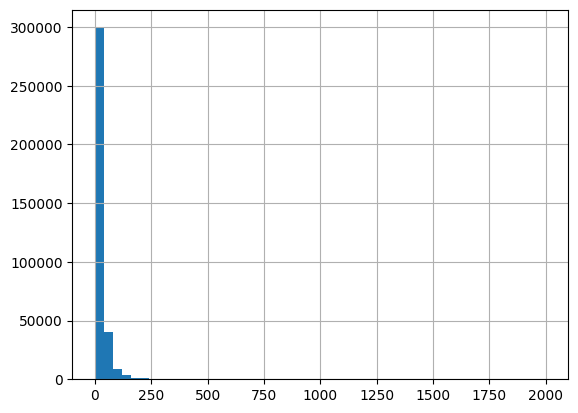

In [17]:
df['price'].hist(bins=50)


Question 1.3

Exploring the shipping information from the data:

• Write code to find out the percentage of the items that are paid by the buyers.

• Draw (two) histogram graphs in one plot on the price for seller pays shipping and buyer
pays shipping (50 bins).

• When buying the items online, do you need to pay higher price if seller pays for the
shipping? Write the code to find out (Compare the median price of items paid by buyers
and items paid by sellers, and explain the result in the comment and report).

(Optional: You could use the subplot from EDA)

In [18]:
df['shipping'].value_counts()

0    197064
1    158744
Name: shipping, dtype: int64

0 as Buyers
1 as Sellers

In [19]:
shiiping_series = df['shipping'].value_counts()


In [20]:
(shiiping_series[0] / (shiiping_series[0] + shiiping_series[1])) *100

55.38492670204155

In [21]:
import matplotlib.pyplot as plt

In [22]:
buyers_price = df[df['shipping']==0]['price']
sellers_price = df[df['shipping']==1]['price']

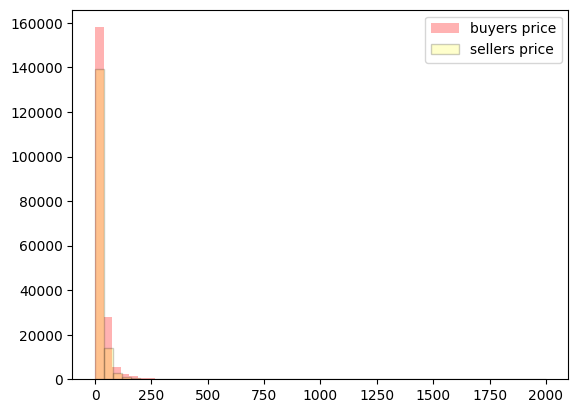

In [23]:
# plotting first histogram
plt.hist(buyers_price, label='buyers price', bins=50, alpha=.3, color='red')

# plotting second histogram
plt.hist(sellers_price, label="sellers price", bins=50, alpha=.2,
         edgecolor='black', color='yellow')
plt.legend()

# Showing the plot using plt.show()
plt.show()

In [24]:
buyers_price_median = buyers_price.median()
sellers_price_median = sellers_price.median()

In [25]:
print(f'{buyers_price_median=}')
print(f'{sellers_price_median=}')

buyers_price_median=19.0
sellers_price_median=14.0


Buyer is paying more than sellers

Question 1.4

You are required to find out the item condition information from the data. Lower the number
(value), the better condition of the item.

• Write the code to find out (print) the count of the rows on each number (value) in column
item_condition_id.

• Draw the boxplot graphs (one plot) on the price for each item condition value, and find out
out whether the better condition of the item could have higher median price (draw the plot
and answer this question in the comment and report).


In [26]:
df['item_condition_id'].value_counts()

1    153402
3    104248
2     89843
4      7768
5       547
Name: item_condition_id, dtype: int64

In [27]:
import seaborn as sns

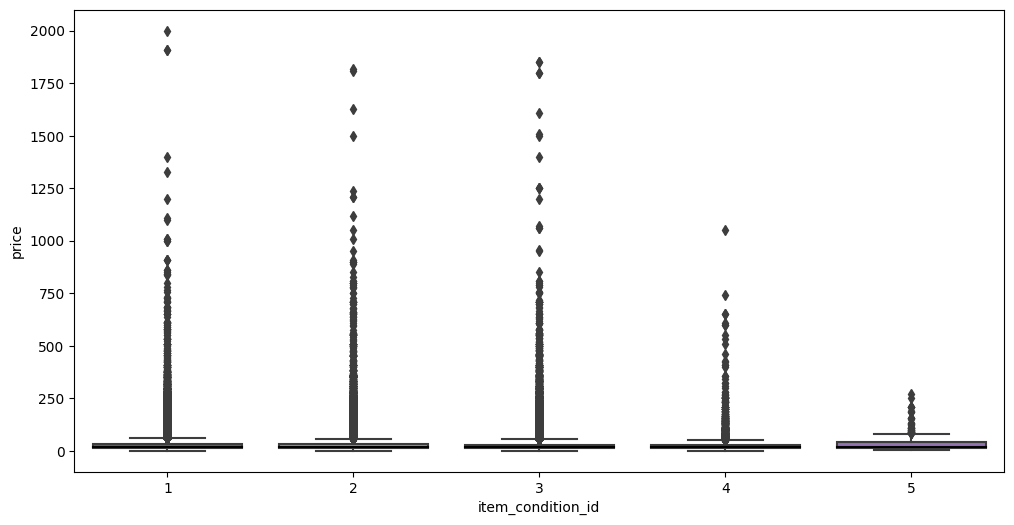

In [28]:
#plt.figure(figsize=(12, 24))
plt.figure(figsize=(12, 6))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

sns.boxplot(df , x='item_condition_id', y='price', palette=colors, medianprops={'color': 'black'})

plt.show()

In [29]:
df.groupby('item_condition_id')['price'].median()

item_condition_id
1    18.0
2    17.0
3    16.0
4    15.0
5    19.0
Name: price, dtype: float64

Question 1.5

Conduct the category analysis and find out the relevant information:


• Write the code to find out (print) how many unique categories you could find from column
category_name.

• For the items with worst condition only (highest value from item_condition_id), write code
to (print) find out the top 3 categories (now you probably understand the findings you had
in Question 1.4).

In [30]:
df['category_name'].value_counts()

Women/Athletic Apparel/Pants, Tights, Leggings    14336
Women/Tops & Blouses/T-Shirts                     11187
Beauty/Makeup/Face                                 8234
Beauty/Makeup/Lips                                 7188
Electronics/Video Games & Consoles/Games           6391
                                                  ...  
Handmade/Patterns/Handmade                            1
Vintage & Collectibles/Serving/Glassware              1
Handmade/Clothing/Dress                               1
Handmade/Pets/Toy                                     1
Handmade/Books and Zines/Comic                        1
Name: category_name, Length: 1135, dtype: int64

In [31]:
len(df['category_name'].value_counts())

1135

There are 1135 category names are there

In [32]:
df[df['item_condition_id'] == 5]['category_name'].value_counts()[0:3]

Electronics/Cell Phones & Accessories/Cell Phones & Smartphones    137
Electronics/Video Games & Consoles/Games                            42
Electronics/Video Games & Consoles/Consoles                         35
Name: category_name, dtype: int64

Question 1.6

The categories in column category_name have 3 parts. The three parts (main_cat,subcat_1 and
subcat_2) are concatenated with ’/’ character sequentially in the data now.

• Write the function (must be function) to split the text content (string value in each row) in
column category_name by ’/’ character. you need to handle the exception in the function
for those has missing values (NaN). For missing values (NaN), the results from splitting
should be ”Category Unknown”, ”Category Unknown”, ”Category Unknown”.

• Use the above function you wrote to create three new columns main_cat,subcat_1 and
subcat_2 with corresponding values from the result of splitting. Print out the dataframe to
show the top 5 rows for three new columns main_cat,subcat_1 and subcat_2.

In [33]:
from  math import isnan

In [34]:

def split_column(x):
    if isinstance(x,str):
        return x.split('/')
    elif isnan(x):
        return 'Category Unknown', 'Category Unknown', 'Category Unknown'

In [35]:
df['main_cat'],df['subcat_1'],df['subcat_2'] = zip(*df['category_name'].apply(split_column))


In [36]:
df.head(5)

train_id                            name  item_condition_id  \
0    128037        Bundle for Sassy Sisters                  3   
1    491755                    PINK VS TANK                  2   
2    470924      Funko Pop Unmasked Cyclops                  1   
3    491263                 Baby Roshe Runs                  3   
4    836489  Baby Girl Ralph Lauren dresses                  3   

                        category_name    brand_name  price  shipping  \
0         Women/Tops & Blouses/Blouse           NaN   16.0         0   
1     Women/Tops & Blouses/Tank, Cami           NaN   17.0         0   
2  Kids/Toys/Action Figures & Statues         Funko   30.0         1   
3               Kids/Boys 2T-5T/Shoes          Nike   19.0         0   
4         Kids/Girls 0-24 Mos/Dresses  Ralph Lauren   24.0         0   

                                   clean_description main_cat        subcat_1  \
0  max cleo black dress paper crane black tank to...    Women  Tops & Blouses   
1       sequin pink sign sequins missing gently worn    Women  Tops & Blouses   
2  box great condition comes soft pop protector p...     Kids            Toys   
3                 baby black nike roshe runs size 5c     Kids      Boys 2T-5T   
4  2 polo dresses 3 months wore washed dreft pink...     Kids  Girls 0-24 Mos   

                   subcat_2  
0                    Blouse  
1                Tank, Cami  
2  Action Figures & Statues  
3                     Shoes  
4                   Dresses

Question 1.7

After splitting the category for column category_name, we now have the three main details
regarding to the category information. However, we need to clean the text in each of the new
three columns in lowercase.

• Write code (or function) to change the text (value in each row) from the new three columns
to lowercase.

• Draw the bar chart to find out the top 5 most popular main categories (in column main_cat)
in the data (only showing the top 5).

• Write code (or function) to (print) find out how many unique main categories (in col umn
main_cat), unique first sub-categories (in column subcat_1) and unique second
sub-categories (in column subcat_2) respectively.

In [37]:
def lower_case(x):
    return x.lower()
df['main_cat']=df['main_cat'].apply(lower_case)
df['subcat_1']=df['subcat_1'].apply(lower_case)
df['subcat_2']=df['subcat_2'].apply(lower_case)

In [38]:
df.head(5)

train_id                            name  item_condition_id  \
0    128037        Bundle for Sassy Sisters                  3   
1    491755                    PINK VS TANK                  2   
2    470924      Funko Pop Unmasked Cyclops                  1   
3    491263                 Baby Roshe Runs                  3   
4    836489  Baby Girl Ralph Lauren dresses                  3   

                        category_name    brand_name  price  shipping  \
0         Women/Tops & Blouses/Blouse           NaN   16.0         0   
1     Women/Tops & Blouses/Tank, Cami           NaN   17.0         0   
2  Kids/Toys/Action Figures & Statues         Funko   30.0         1   
3               Kids/Boys 2T-5T/Shoes          Nike   19.0         0   
4         Kids/Girls 0-24 Mos/Dresses  Ralph Lauren   24.0         0   

                                   clean_description main_cat        subcat_1  \
0  max cleo black dress paper crane black tank to...    women  tops & blouses   
1       sequin pink sign sequins missing gently worn    women  tops & blouses   
2  box great condition comes soft pop protector p...     kids            toys   
3                 baby black nike roshe runs size 5c     kids      boys 2t-5t   
4  2 polo dresses 3 months wore washed dreft pink...     kids  girls 0-24 mos   

                   subcat_2  
0                    blouse  
1                tank, cami  
2  action figures & statues  
3                     shoes  
4                   dresses

In [39]:
main_cat_unique = df['main_cat'].value_counts()

In [40]:
main_cat_unique

women                     159497
beauty                     49790
kids                       41146
electronics                29172
men                        22582
home                       16272
vintage & collectibles     11207
other                      10958
handmade                    7520
sports & outdoors           6125
category unknown            1539
Name: main_cat, dtype: int64

<Axes: >

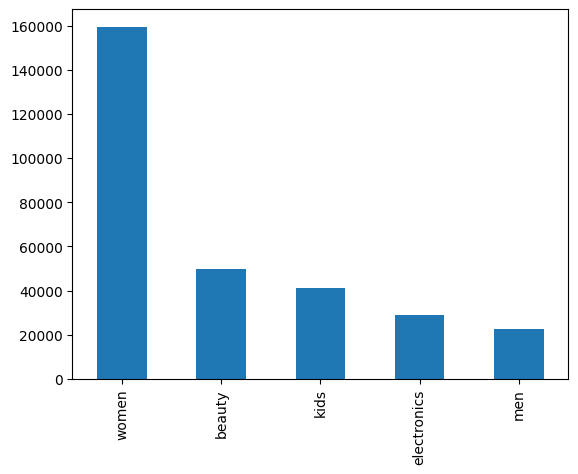

In [41]:
main_cat_unique[0:5].plot.bar()

In [42]:
subcat_1_unique = df['subcat_1'].value_counts()
subcat_2_unique = df['subcat_2'].value_counts()

In [43]:
subcat_1_unique

athletic apparel         32185
makeup                   29917
tops & blouses           25666
shoes                    24138
jewelry                  14798
                         ...  
suits                       13
quilts                      10
ceramics and pottery        10
blazers & sport coats       10
dolls and miniatures        10
Name: subcat_1, Length: 114, dtype: int64

In [44]:
subcat_2_unique

t-shirts                   14768
pants, tights, leggings    14336
other                      12017
face                       11962
shoes                       7647
                           ...  
storage cabinets               1
chain                          1
bass guitars                   1
dishes                         1
kids' flatware                 1
Name: subcat_2, Length: 788, dtype: int64

In [45]:
print(f'unique values in main category is {len(main_cat_unique)}')
print(f'unique values in first sub-categories is {len(subcat_1_unique)}')
print(f'unique values in second sub-categories is {len(subcat_2_unique)}')

unique values in main category is 11
unique values in first sub-categories is 114
unique values in second sub-categories is 788


Question 1.8

Exploring the price and categories.

• Write code to (print) find out the median price for all the categories in new column main_cat.

• Draw the bar chart to find out the top 10 most expensive first sub-categories (in column
subcat_1) in the data.

• Draw the bar chart to find out the top 10 cheapest second sub-categories (in column
subcat_2) in the data.

In [46]:
df.groupby('main_cat')['price'].median()

main_cat
beauty                    15.0
category unknown          18.0
electronics               15.0
handmade                  12.0
home                      18.0
kids                      14.0
men                       21.0
other                     14.0
sports & outdoors         16.0
vintage & collectibles    16.0
women                     19.0
Name: price, dtype: float64

In [47]:
df.groupby('subcat_1')['price'].median().sort_values(ascending=False)

subcat_1
cameras & photography    40.0
computers & tablets      40.0
strollers                39.5
suits                    36.0
musical instruments      34.0
                         ... 
children                  9.0
art                       8.5
trading cards             8.0
quilts                    6.5
paper goods               5.0
Name: price, Length: 114, dtype: float64

<Axes: xlabel='subcat_1'>

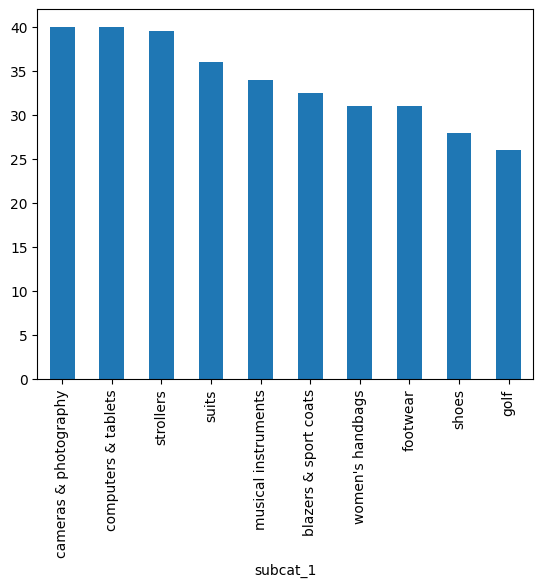

In [48]:
df.groupby('subcat_1')['price'].median().sort_values(ascending=False)[0:10].plot.bar()

In [49]:
df.groupby('subcat_2')['price'].median().sort_values(ascending=True)

subcat_2
historical, military        3.0
photography                 3.0
necktie                     3.0
print                       4.0
sticker                     4.0
                          ...  
desktops & all-in-ones    112.5
standard                  113.0
travel systems            115.0
lightweight               126.5
air conditioners          175.0
Name: price, Length: 788, dtype: float64

<Axes: xlabel='subcat_2'>

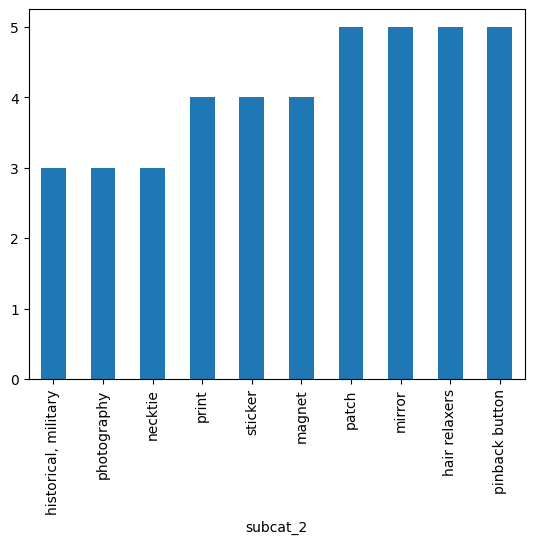

In [50]:
df.groupby('subcat_2')['price'].median().sort_values(ascending=True)[0:10].plot.bar()

Question 1.9

Exploring the price and brand.

• Write code to (print) find out the median price for all the brands (fill NaN with ’brand
unavailable’).

• Draw the bar chart to find out the top 10 most popular brands in the data.

In [51]:
def fill_values(x):
    if isinstance(x,str):
        return x
    elif isnan(x):
        return  'brand unavailable'
df['brand_name'] = df['brand_name'].apply(fill_values)

In [52]:
df.groupby('brand_name')['price'].median().sort_values(ascending=True)

brand_name
Chamilia                      0.0
B O X Packaging               3.0
B is for Bear                 3.0
Gold Bond                     3.0
A.B.S. by Allen Schwartz      3.0
                            ...  
Lanvin                      246.0
IBM                         275.0
Blendtec                    280.0
Stuart Weitzman             339.0
Tiffany Designs             359.0
Name: price, Length: 3047, dtype: float64

In [53]:
df.groupby('brand_name')['price'].count().sort_values(ascending=False)

brand_name
brand unavailable    151956
PINK                  13376
Nike                  13182
Victoria's Secret     11544
LuLaRoe                7272
                      ...  
Mainstreet Blues          1
Baltex                    1
Mackintosh                1
Bamboo                    1
Mermaid Maternity         1
Name: price, Length: 3047, dtype: int64

<Axes: xlabel='brand_name'>

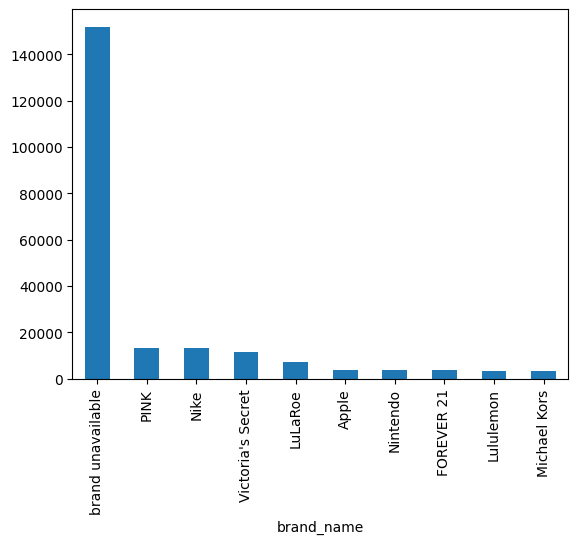

In [54]:
df.groupby('brand_name')['price'].count().sort_values(ascending=False)[0:10].plot.bar()

Question 1.10

Item Description Analysis.

• Could you draw the wordcloud chart by using the column clean_description.

• Divide the data with quantiles of the price (using qcut from pandas to obtain the first/sec
ond/third/fourth quantile).

• Draw the wordcould by using the column clean_description on each quantile of price data.

https://www.kaggle.com/code/olgaberezovsky/word-cloud-using-python-pandas

In [55]:
# pip install wordcloud

In [56]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [57]:
df['clean_description'] = df['clean_description'].fillna("")

In [58]:
word_string = " ".join(df['clean_description'].str.lower())

(-0.5, 1599.5, 799.5, -0.5)

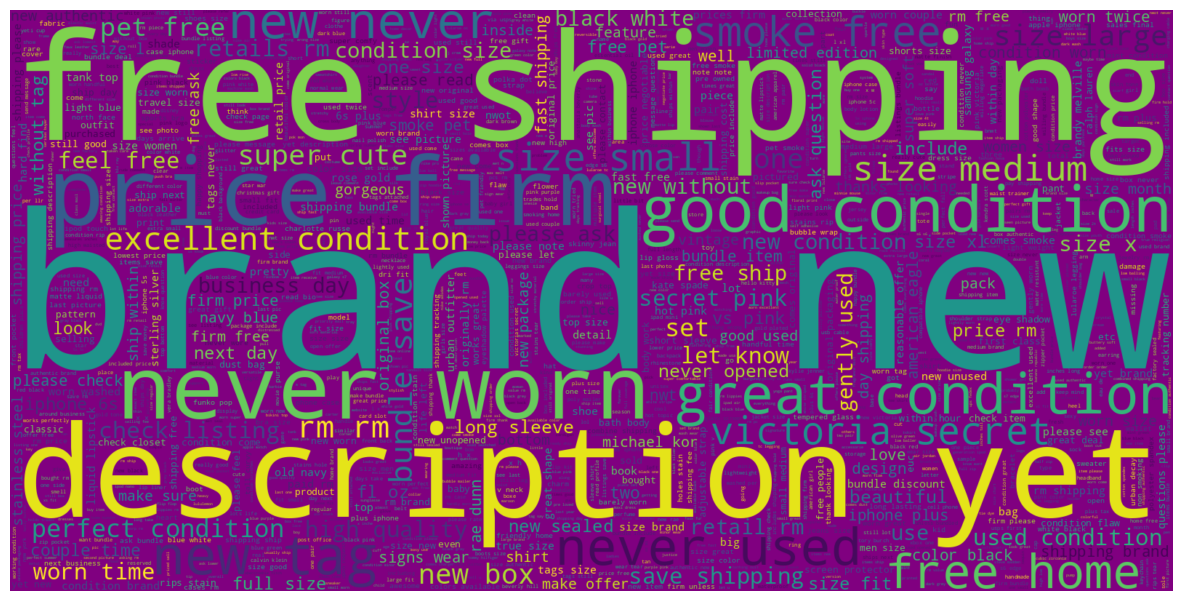

In [59]:
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="purple", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

https://pbpython.com/pandas-qcut-cut.html

In [60]:
df['quantile'] = pd.qcut(df['price'],q=4 , labels=['first quantile','second quantile',
                                                   'third quantile ', 'fourth quantile'])


In [61]:
def plot_word_cloud(df):
    if len(df) == 0 :
        return "No records"
    word_string = " ".join(df['clean_description'].str.lower())
    plt.figure(figsize=(15,15))
    wc = WordCloud(background_color="purple", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
    wc.generate(word_string)

    plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
    plt.axis('off')

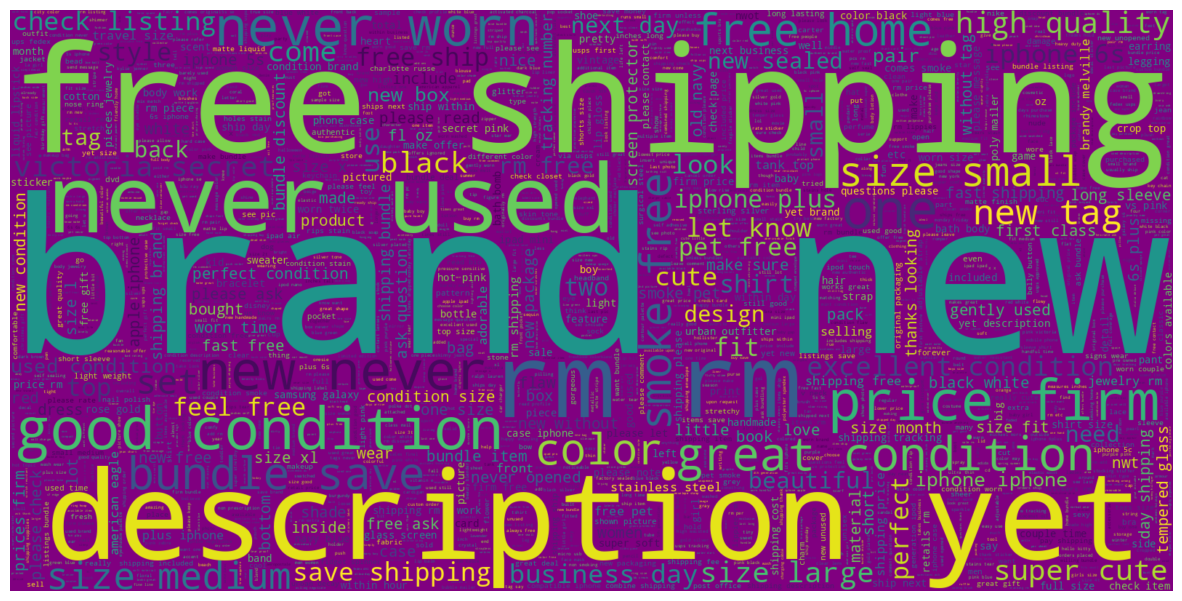

In [62]:
plot_word_cloud(df[df['quantile'] == 'first quantile'])

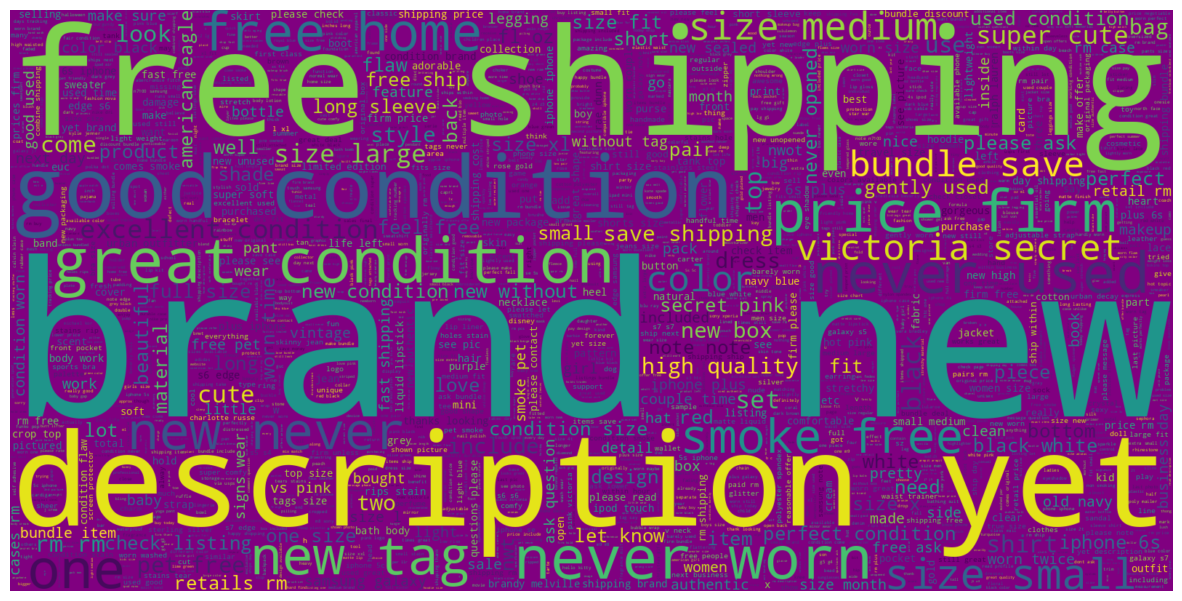

In [63]:
plot_word_cloud(df[df['quantile'] == 'second quantile'])

In [64]:
plot_word_cloud(df[df['quantile'] == 'third quantile'])

'No records'

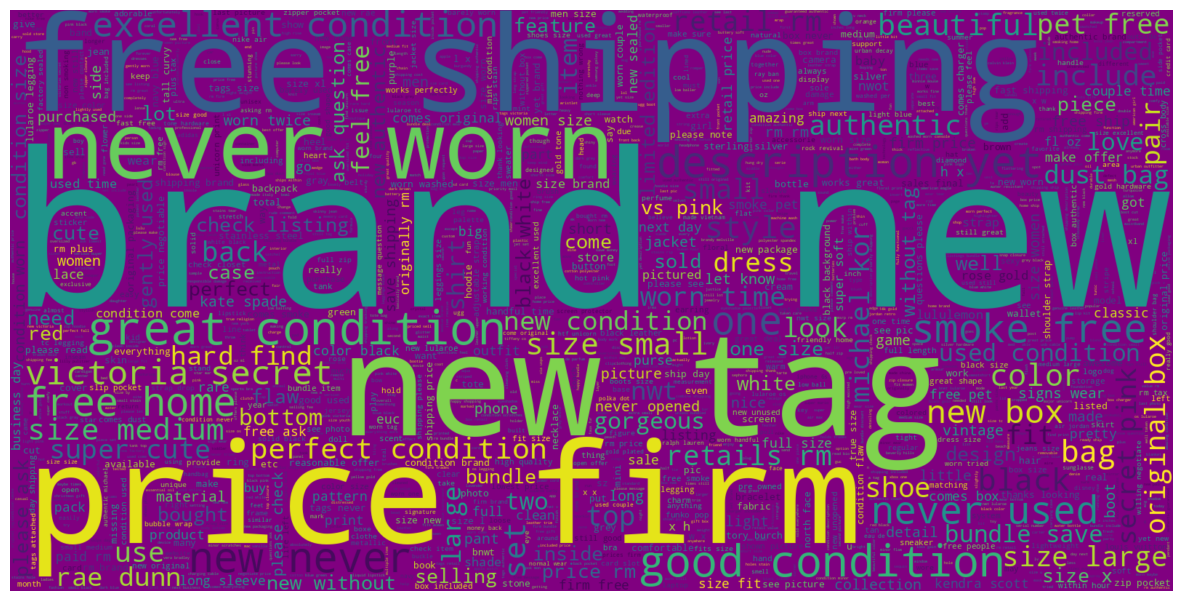

In [65]:
plot_word_cloud(df[df['quantile'] == 'fourth quantile'])